In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

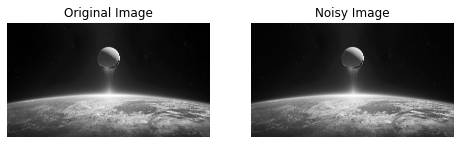

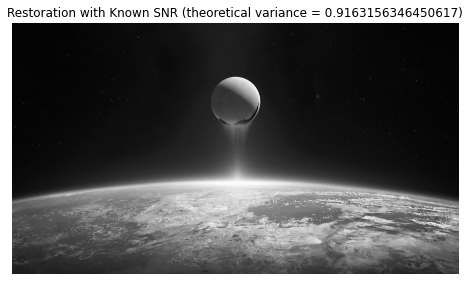

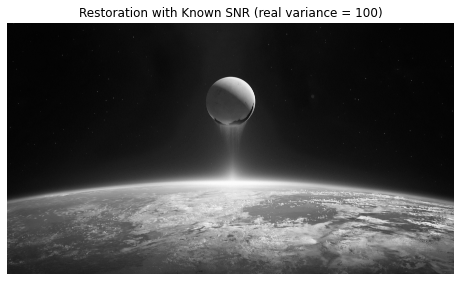

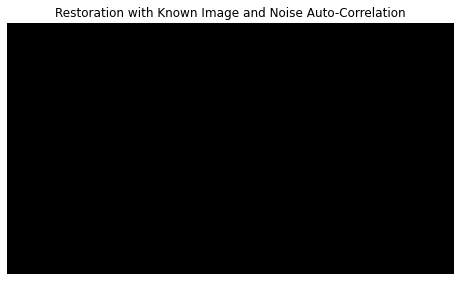

In [2]:
# 读取图像
img = cv2.imread('test.jpg', 0)  

# 添加高斯噪声
mean = 0
var = 100
sigma = var ** 0.5
gauss = np.random.normal(mean, sigma, img.shape)
noisy_img = img + gauss
noisy_img = np.uint8(np.clip(noisy_img, 0, 255))  # 将像素值限制在0～255之间

# 显示原始图像和带噪声的图像
plt.figure(figsize=[8,8])
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('Original Image'); plt.axis('off')
plt.subplot(122); plt.imshow(noisy_img, cmap='gray'); plt.title('Noisy Image'); plt.axis('off')
plt.show()

# 傅里叶变换
f = np.fft.fft2(noisy_img)
fshift = np.fft.fftshift(f)

# 信噪比已知（理论噪声方差）
SNR_theory = 20  # dB
P_s = np.sum(img ** 2) / (img.shape[0] * img.shape[1])
P_n = P_s / (10 ** (SNR_theory / 10))
H = np.abs(fshift) ** 2 / (np.abs(fshift) ** 2 + P_n / P_s)
G = H * fshift
f_ishift = np.fft.ifftshift(G)  # 对频率矩阵进行逆平移
img_back_isnr = np.fft.ifft2(f_ishift)
img_back_isnr = np.abs(img_back_isnr)  # 取振幅

# 信噪比已知（实际噪声方差）
SNR_real = 10  # dB
var_n = P_s / (10 ** (SNR_real / 10))
H = np.abs(fshift) ** 2 / (np.abs(fshift) ** 2 + var_n)
G = H * fshift
f_ishift = np.fft.ifftshift(G)  # 对频率矩阵进行逆平移
img_back_real = np.fft.ifft2(f_ishift)
img_back_real = np.abs(img_back_real)  # 取振幅

# 图像和噪声自相关函数已知
kernel = np.ones((3, 3)) / 9
img_smooth = cv2.filter2D(noisy_img, -1, kernel)
var_n = var
H = np.conj(fshift) / (np.abs(fshift) ** 2 + var_n / (np.abs(np.fft.fft2(kernel, noisy_img.shape)) ** 2 + 1e-10))
G = H * fshift
f_ishift = np.fft.ifftshift(G)  # 对频率矩阵进行逆平移
img_back_known = np.fft.ifft2(f_ishift)
img_back_known = np.abs(img_back_known)  # 取振幅

# 显示信噪比已知（理论噪声方差）的复原结果
plt.figure(figsize=[8,8])
plt.title('Restoration with Known SNR (theoretical variance = {})'.format(P_n))
plt.imshow(img_back_isnr, cmap='gray')
plt.axis('off')
plt.show()

# 显示信噪比已知（实际噪声方差）的复原结果
plt.figure(figsize=[8,8])
plt.title('Restoration with Known SNR (real variance = {})'.format(var_n))
plt.imshow(img_back_real, cmap='gray')
plt.axis('off')
plt.show()

# 显示图像和噪声自相关函数已知的复原结果
plt.figure(figsize=[8,8])
plt.title('Restoration with Known Image and Noise Auto-Correlation')
plt.imshow(img_back_known, cmap='gray')
plt.axis('off')
plt.show()